In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install numpy==1.22.1

In [3]:
!pip install tensorflow

In [4]:
!pip install tensorflow==2.9.0

In [5]:
import numpy as np
import pickle
import cv2
import keras
from os import listdir
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = "C:/Users/dhivy/Downloads/dataset/datasetgraph"
width=256
height=256
depth=3

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None


In [8]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os
import re

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = "C:/Users/dhivy/Downloads/dataset"
width = 256
height = 256
depth = 3

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

def is_image(filename):
    return re.match(r".*\.(jpg|jpeg|png|bmp|tiff|JPG)$", filename, re.IGNORECASE) is not None

image_list, label_list = [],[]

try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(directory_root)

    for directory in root_dir:
        # Remove .DS_Store from list
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = os.listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:
            # Remove .DS_Store from list
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = os.listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}")

            for single_plant_disease_image in plant_disease_image_list:
                if is_image(single_plant_disease_image):
                    image_directory = os.path.join(directory_root, plant_folder, plant_disease_folder, "image1.JPG")
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error: {e}")


[INFO] Loading images ...
[INFO] Processing PlantVillage ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___Esca_(Black_Measles) ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing train ...
[INFO] Processing valid ...
[INFO] Image loading completed


In [9]:
len(image_list)

4062

In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import LabelBinarizer

# Rest of your code
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [12]:
print(label_binarizer.classes_)

['Grape___Black_rot' 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy']


In [13]:
np_image_list = np.array(image_list[0], dtype=np.float32) / 255.0
print("[INFO] Conversion to NumPy array completed")

[INFO] Conversion to NumPy array completed


In [14]:
from sklearn.model_selection import train_test_split

# Assuming label_list contains the correct labels for each image
print("[INFO] Splitting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, label_list[:len(np_image_list)], test_size=0.2, random_state=42)



[INFO] Splitting data to train, test


In [15]:
++aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
 +   fill_mode="nearest")

In [16]:
++from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

# Define the model
model = Sequential()

# Define the input shape and channel dimension
inputShape = (128, 128, 3)
chanDim = -1
# Add the layers to the model
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
    `

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
mode++l.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(os.listdir('C:/Users/dhivy/Downloads/dataset/datasetgraph'))))
model.add(Activation("softmax"))


 
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of ImageDataGenerator for data augmentation and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    'C:/Users/dhivy/Downloads/dataset/datasetgraph', 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode='categorical',
    subset='training'  # Specify this is for training data
)

# Create a generator for validation data
valid_generator = train_datagen.flow_from_directory(
    'C:/Users/dhivy/Downloads/dataset/datasetgraph', 
    target_size=(128, 128), 
    batch_size=32, 
    c
    lass_mode='categorical',
    
    
    +
    subset='validation'  # Specify this is for validation data
)

# Fit the model using fit_generator with validation data
history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=20,  # Increase the number of epochs
    validation_data=valid_generator,  # Use the validation data here
    validation_steps=len(valid_generator)  # Number of validation steps
)




Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.
Epoch 1/20
102/102 [==============================] - 89s 857ms/step - loss: 0.8513 - accuracy: 0.7484 - val_loss: 11.5627 - val_accuracy: 0.1036
Epoch 2/20
102/102 [==============================] - 88s 860ms/step - loss: 0.5110 - accuracy: 0.8253 - val_loss: 14.4533 - val_accuracy: 0.3206
Epoch 3/20
102/102 [==============================] - 90s 879ms/step - loss: 0.3349 - accuracy: 0.8794 - val_loss: 10.8506 - val_accuracy: 0.2651
Epoch 4/20
102/102 [==============================] - 144s 1s/step - loss: 0.2980 - accuracy: 0.8970 - val_loss: 6.6769 - val_accuracy: 0.3428
Epoch 5/20
102/102 [==============================] - 128s 1s/step - loss: 0.2505 - accuracy: 0.9099 - val_loss: 7.3363 - val_accuracy: 0.3231
Epoch 6/20
102/102 [==============================] - 91s 892ms/step - loss: 0.2509 - accuracy: 0.9093 - val_loss: 3.6860 - val_accuracy: 0.4192
Epoch 7/20
102/102 [============================

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        1

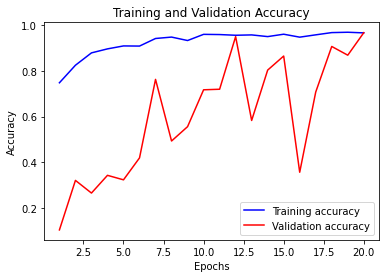

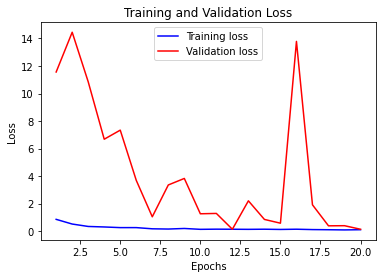

In [18]:
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracies
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation losses
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
for epoch, accuracy, loss_value in zip(range(1, len(acc) + 1), acc, loss):
    print(f"Epoch {epoch}: Training Accuracy = {accuracy}, Training Loss = {loss_value}")

Epoch 1: Training Accuracy = 0.7483851313591003, Training Loss = 0.8512687087059021
Epoch 2: Training Accuracy = 0.8252845406532288, Training Loss = 0.5109853148460388
Epoch 3: Training Accuracy = 0.8794217109680176, Training Loss = 0.33488166332244873
Epoch 4: Training Accuracy = 0.8969547748565674, Training Loss = 0.29802510142326355
Epoch 5: Training Accuracy = 0.909873902797699, Training Loss = 0.25049129128456116
Epoch 6: Training Accuracy = 0.9092586636543274, Training Loss = 0.2509472072124481
Epoch 7: Training Accuracy = 0.9424792528152466, Training Loss = 0.16416867077350616
Epoch 8: Training Accuracy = 0.9486311674118042, Training Loss = 0.14651533961296082
Epoch 9: Training Accuracy = 0.9335588812828064, Training Loss = 0.18837977945804596
Epoch 10: Training Accuracy = 0.9606274962425232, Training Loss = 0.1257835030555725
Epoch 11: Training Accuracy = 0.9597046971321106, Training Loss = 0.1377299726009369
Epoch 12: Training Accuracy = 0.9566287398338318, Training Loss = 0.1

In [20]:
# Evaluate the model on test data
test_scores = model.evaluate(valid_generator, steps=len(valid_generator))
test_accuracy = test_scores[1]

# Print test accuracy
print(f"Test Accuracy: {test_accuracy}")


26/26 [==============================] - 6s 227ms/step - loss: 0.1125 - accuracy: 0.9605
Test Accuracy: 0.9605425596237183
